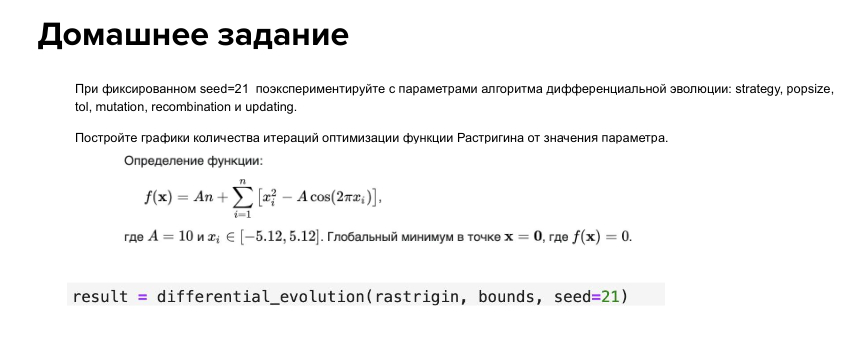

In [1]:
import numpy as np

def rastrigin(x, A=10):
    fx=A*len(x)
    for xi in x:
        fx += xi**2-A*np.cos(2*np.pi*xi)
    return fx

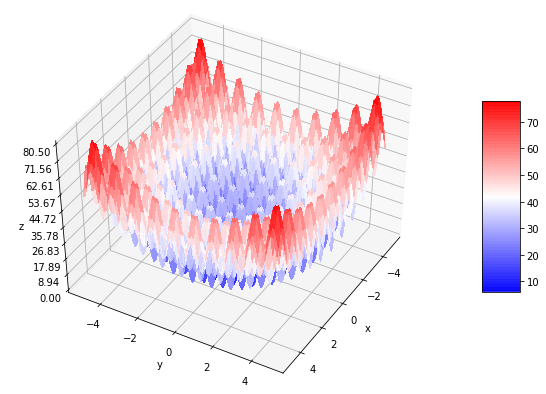

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=[10,7])

ax = fig.gca(projection = "3d")
ax.view_init(45, 30)

# Make data.
X = np.arange(-5, 5, 0.1)
Y = np.arange(-5, 5, 0.1)
X, Y = np.meshgrid(X, Y)

Z = rastrigin(np.array([X, Y]))

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap='bwr',
                       linewidth=10, antialiased=False, alpha=0.8)

ax.zaxis.set_major_locator(LinearLocator(10))

ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

In [4]:
from scipy.optimize import minimize, differential_evolution
import pandas as pd

## График зависимости количества итераций от strategy

In [27]:
strategies = ['best1bin',
'best1exp',
'rand1exp',
'randtobest1exp',
'currenttobest1exp',
'best2exp',
'rand2exp',
'randtobest1bin',
'currenttobest1bin',
'best2bin',
'rand2bin',
'rand1bin',]

In [44]:
bounds= [(-5.12, 5.12), (-5.12, 5.12)]
nit_count = []
for strategy in strategies:
    res = differential_evolution(rastrigin, bounds, seed=21, strategy=strategy, 
                             popsize=15, tol=0.01, mutation=(0.5, 1), recombination=0.7, updating='immediate')
    nit_count.append(res.nit)
nit_count

[67, 105, 184, 122, 165, 167, 268, 85, 99, 126, 197, 121]

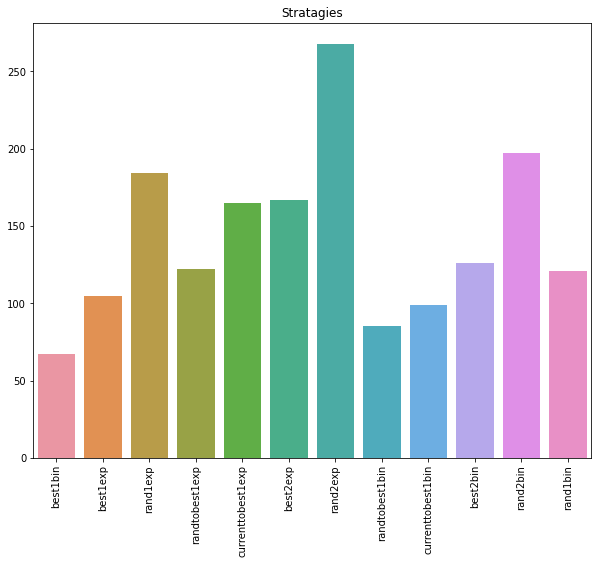

In [45]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
plt.title('Stratagies')
sns.barplot(x=strategies, y=nit_count,)
plt.xticks(rotation=90)

plt.show()

## График зависимости количества итераций от popsize

In [60]:
popsizies = range(50)

In [ ]:
bounds= [(-5.12, 5.12), (-5.12, 5.12)]
nit_count = []
for popsize in popsizies:
    res = differential_evolution(rastrigin, bounds, seed=21, strategy='best1bin', 
                             popsize=popsize, tol=0.01, mutation=(0.5, 1), recombination=0.7, updating='immediate')
    nit_count.append(res.nit)


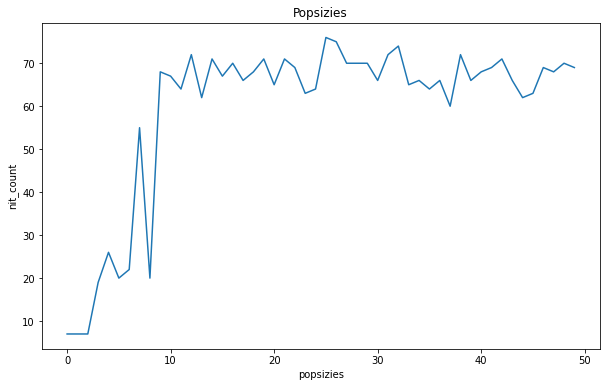

In [62]:
plt.figure(figsize=(10, 6))
plt.title('Popsizies')
sns.lineplot(x=popsizies, y=nit_count,)
plt.xlabel('popsizies')
plt.ylabel('nit_count')

plt.show()

## График зависимости количества итераций от tol

In [79]:
tols = np.arange(0, 1, 0.01)

In [80]:
bounds= [(-5.12, 5.12), (-5.12, 5.12)]
nit_count = []
for tol in tols:
    res = differential_evolution(rastrigin, bounds, seed=21, strategy='best1bin', 
                             popsize=15, tol=tol, mutation=(0.5, 1), recombination=0.7, updating='immediate')
    nit_count.append(res.nit)

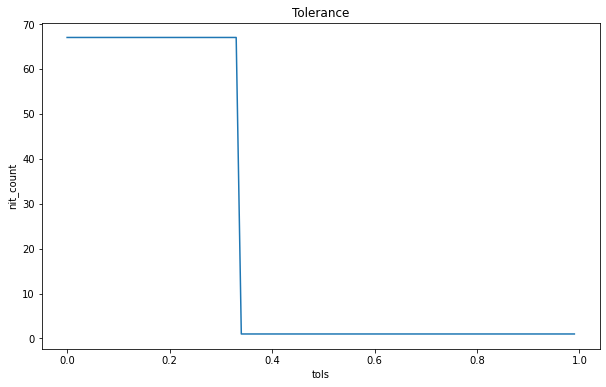

In [81]:
plt.figure(figsize=(10, 6))
plt.title('Tolerance')
sns.lineplot(x=tols, y=nit_count,)
plt.xlabel('tols')
plt.ylabel('nit_count')

plt.show()

## График зависимости количества итераций от mutation

In [85]:
mutations = np.arange(0, 2, 0.1)

In [90]:
bounds= [(-5.12, 5.12), (-5.12, 5.12)]
nit_count = []
for mutation in mutations:
    res = differential_evolution(rastrigin, bounds, seed=21, strategy='best1bin', 
                             popsize=15, tol=0.01, mutation=mutation, recombination=0.7, updating='immediate')
    nit_count.append(res.nit)

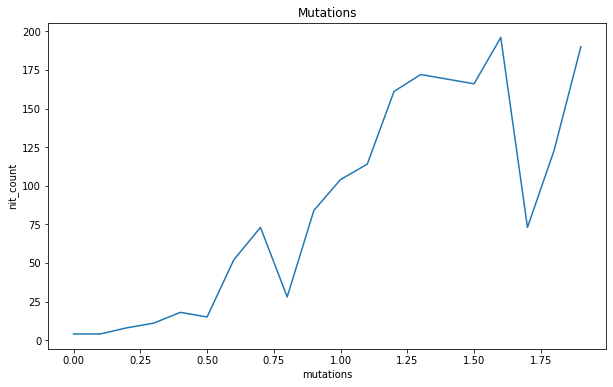

In [91]:
plt.figure(figsize=(10, 6))
plt.title('Mutations')
sns.lineplot(x=mutations, y=nit_count,)
plt.xlabel('mutations')
plt.ylabel('nit_count')

plt.show()

## График зависимости количества итераций от recombination

In [92]:
recombinations = np.arange(0, 1, 0.01)

In [93]:
bounds= [(-5.12, 5.12), (-5.12, 5.12)]
nit_count = []
for recombination in recombinations:
    res = differential_evolution(rastrigin, bounds, seed=21, strategy='best1bin', 
                             popsize=15, tol=0.01, mutation=(0.5, 1), recombination=recombination, updating='immediate')
    nit_count.append(res.nit)

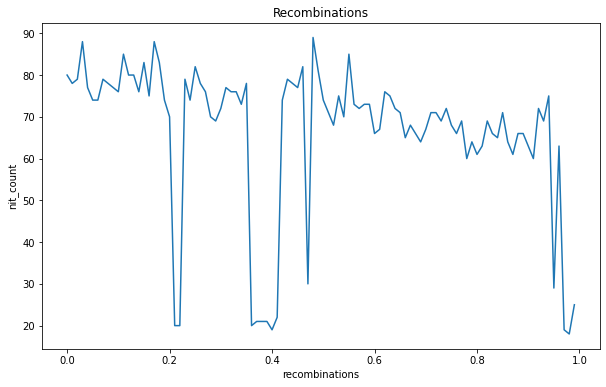

In [94]:
plt.figure(figsize=(10, 6))
plt.title('Recombinations')
sns.lineplot(x=recombinations, y=nit_count,)
plt.xlabel('recombinations')
plt.ylabel('nit_count')

plt.show()

## График зависимости количества итераций от updating

In [96]:
updatings = ['immediate', 'deferred',]

In [97]:
bounds= [(-5.12, 5.12), (-5.12, 5.12)]
nit_count = []
for updating in updatings:
    res = differential_evolution(rastrigin, bounds, seed=21, strategy='best1bin', 
                             popsize=15, tol=0.01, mutation=(0.5, 1), recombination=0.7, updating=updating)
    nit_count.append(res.nit)

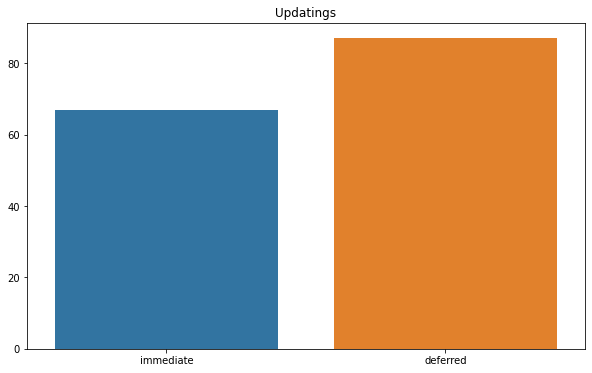

In [100]:
plt.figure(figsize=(10, 6))
plt.title('Updatings')
sns.barplot(x=updatings, y=nit_count,)

plt.show()